> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

copyright:  Sem informações de copyright 
explanation:  These dark pillars may look destructive, but they are creating stars.  This pillar-capturing picture of the Eagle Nebula combines visible light exposures taken with the Hubble Space Telescope with infrared images taken with the James Webb Space Telescope to highlight evaporating gaseous globules (EGGs) emerging from pillars of molecular hydrogen gas and dust.  The giant pillars are light years in length and are so dense that interior gas contracts gravitationally to form stars.  At each pillar's end, the intense radiation of bright young stars causes low density material to boil away, leaving stellar nurseries of dense EGGs exposed.  The Eagle Nebula, associated with the open star cluster M16, lies about 7000 light years away.   Jigsaw Challenge: Astronomy Puzzle of the Day


<module 'matplotlib.pyplot' from 'C:\\Users\\Usuario\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>

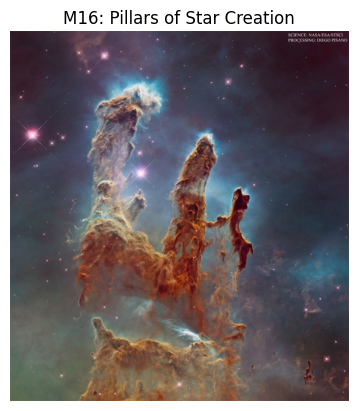

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import requests
import json

key = {}
with open('./key.json','r') as f:
    key = json.load(f)

headers = {
    "Content-Type" : "application/json",
    "x-api-key": key['API_KEY']
}

res = requests.get('https://api.nasa.gov/planetary/apod', headers=headers)

data = res.json()

'''For some reason, the copyright stopped to be returned with the data.
    I searched, and this is normal, so i did this: '''

copyright_info = data.get('copyright', 'Sem informações de copyright')

print('copyright: ',copyright_info, '\nexplanation: ', data['explanation'])

fig, ax = plt.subplots()

img = io.imread(data['url'])
ax.imshow(img)

ax.set_title(data['title'])
ax.axis('off')

plt

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [3]:
headers = res.headers

print(headers,'\n')

print(headers['X-Ratelimit-Limit'], '\n', headers['X-Ratelimit-Remaining'])



{'Date': 'Tue, 22 Oct 2024 21:12:13 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining', 'Age': '2', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Api-Umbrella-Request-Id': 'cimo9bf4d98bmdhta0eg', 'X-Cache': 'MISS', 'X-Content-Type-Options': 'nosniff', 'X-Ratelimit-Limit': '2000', 'X-Ratelimit-Remaining': '1509', 'X-Vcap-Request-Id': '99e9a3d5-609e-45e2-60c7-32841c3a1b51', 'X-Xss-Protection': '1; mode=block', 'X-Frame-Options': 'DENY'} 

2000 
 1509


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [4]:
'''Eu estava recebendo um erro de status code 500 com o endpoint do exercício, então peguei esse que achei no site oficial. Só precisei dar umas adaptadas, mas tem as mesmas informações'''

url_base = 'https://api.nasa.gov/mars-photos/api/v1'
endpoint = '/rovers/curiosity/photos'

params = {
    'sol': 1000,
    'api_key': key['API_KEY']
}

res = requests.get(f'{url_base}{endpoint}', params=params)

print(f"Código de status da resposta: {res.status_code}")

if res.status_code == 200:
    data = res.json()

    photo_manifest = data.get('photos', {})
    max_sol = photo_manifest[0]['rover'].get('max_sol')
    max_date = photo_manifest[0]['rover'].get('max_date')
    
    print(f"Máximo dia marciano (sol): {max_sol}")
    print(f"Última data terrestre de coleta: {max_date}")
else:
    print(f"Erro na requisição. Código de status: {res.status_code}")
    print("Conteúdo da resposta:", res.text)


Código de status da resposta: 200
Máximo dia marciano (sol): 4102
Última data terrestre de coleta: 2024-02-19


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



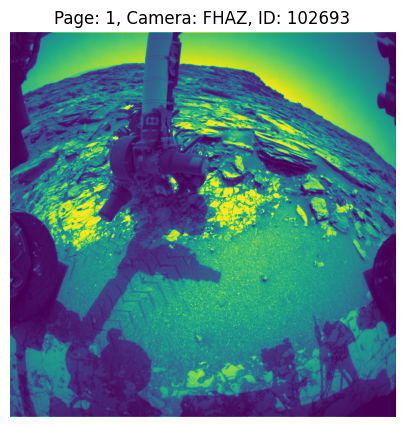

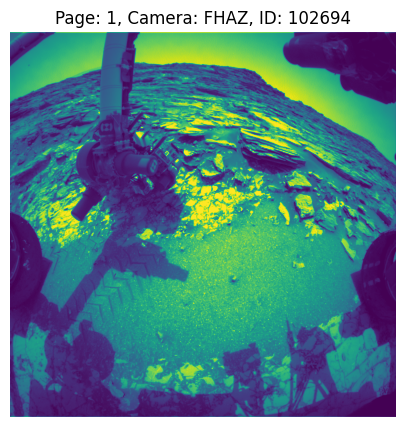

In [5]:
url_base = 'https://api.nasa.gov/mars-photos/api/v1'
endpoint = '/rovers/curiosity/photos'
params = {
    'sol': 1000,
    'api_key': key['API_KEY'],
    'page': 1
}
camera_name = 'FHAZ'

photos = []

while True:
    res = requests.get(f'{url_base}{endpoint}', params=params)
    data = res.json()

    if 'photos' not in data or not data['photos']:
        break
        
    photo_manifest = data.get('photos', {})

    for i in range(len(photo_manifest)):
        camera = photo_manifest[i]['camera'].get('name')
        if camera == camera_name:
            photo = {}
            photo['page'] = params['page']
            photo['camera_name'] = camera
            photo['id'] = photo_manifest[i].get('id')
            photo['img_src'] = photo_manifest[i].get('img_src')

            photos.append(photo)

    params['page'] += 1


for photo in photos:
    img = io.imread(photo['img_src'])
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.title(f'Page: {photo["page"]}, Camera: {photo["camera_name"]}, ID: {photo["id"]}')
    plt.axis('off')
    plt.show()
